## Prediction:
This jupyter notebook allows to predict the k most similar images (celebrities) using a saved trained model.

In [19]:
import pandas
import numpy as np
import torch
# import torchdata
from torch.utils.data import *
import torchvision
from torchvision.transforms import *
import matplotlib.pyplot as plt
import os
import random
import math
from torch.autograd import Variable
from PIL import Image

import os
import sys
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.represation_dummy import RepresationDummy

In [20]:
from src.lfw import LFW
data_dir = "/storage/lfw"

lfw = LFW(data_dir, test_sample=0.2, limit_to_A=False)

## Load the model

In [39]:
model=torch.load("/storage/facerecognition/attr_rep_dummy.model")
model.eval()

## Make prediction

In [43]:
def predict_image(img, mdl, n):
    attr_rep = isinstance(model, RepresationDummy)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    test_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    pred_transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor()
        ])
    if not attr_rep:
        mdl = mdl.to(device)
    image_tensor = test_transforms(img).float()
    image_tensor = image_tensor.unsqueeze_(0)
    pred_tensor = pred_transforms(img).float()
    pred_tensor = pred_tensor.unsqueeze_(0)
    inp = Variable(image_tensor)
    inp = inp.to(device)
    output = mdl(inp)
    if not attr_rep:
        _, index = torch.topk(output, k=n, dim=1)
    else:
        index = output
    index = index.data.cpu().numpy()[0]
    #index = (-index).argsort()[0][:n]
    return index, pred_tensor

## Visualization

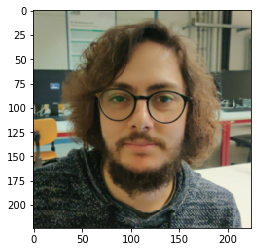

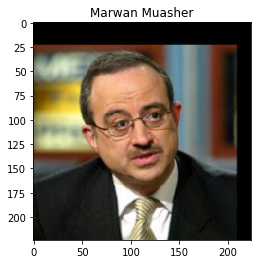

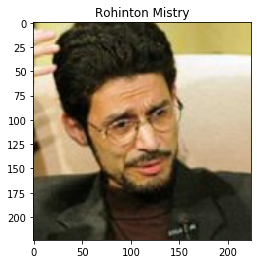

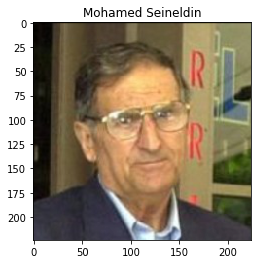

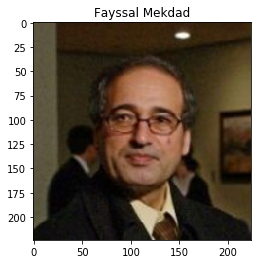

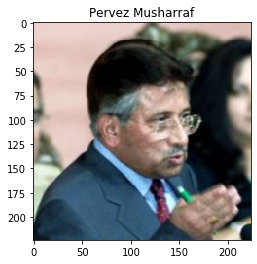

In [44]:
image = Image.open("/storage/facerecognition/img5.jpg")
res, img_tensor = predict_image(image, model, n=5)
#f, axarr = plt.subplots(1,6)
plt.imshow(img_tensor[0].permute((1, 2, 0)))
plt.show()
#axarr[0][0].imshow(image)
for i in range(5):
    img = lfw.get_images(res[i])
    lfw.plot_face(img, res[i])